# Quiz 2 Mata Kuliah Statisitk Komputasi

Nama : Andi Dwi Prastyo<br>
NIM : 2141720046<br>
Absen : 09 <br>
Kelas : TI-2D

### Soal 1
Rata-rata konsentrasi kolesterol darah pada populasi dalam jumlah besar pria dewasa usia 50-60 tahun 
adalah 200mg/dl dengan simpangan baku 20mg/dl. Dianggap pengukuran kolesterol bersebaran 
normal. Berapakah peluang bahwa 100 pria dari kelompok umum ini akan memiliki kolesterol di 
bawah 204 ml/dl?


In [3]:
import scipy.stats as stats

mean = 200  
std_dev = 20  
n = 100  

# Menghitung z-score 
z_score = (204 - mean) / std_dev

# Menghitung peluang 
probability = 1 - stats.norm.cdf(z_score)

# Menampilkan hasil
print("Peluang bahwa 100 pria memiliki kolesterol di bawah 204 mg/dl:")
print(f"{probability:.4f}")


Peluang bahwa 100 pria memiliki kolesterol di bawah 204 mg/dl:
0.4207


### Soal 2

Misalkan spesies tanaman tertentu dengan populasi tidak diketahui (sangat banyak) memiliki varians 
tinggi 16 cm. Diambil sampel sebanyak 25 secara acak kemudian diperoleh rata-rata tingginya adalah 
15 cm. Hitunglah rentang nilai rata-rata populasi dari tinggi tanaman tersebut dengan tingkat 
kepercayaan 95%.


In [4]:
import scipy.stats as stats
import math

sample_mean = 15  
sample_size = 25  
varians_populasi = 16  

# Menghitung standar deviasi populasi
std_dev_populasi = math.sqrt(varians_populasi)

# Menghitung batas atas dan batas bawah interval kepercayaan
alpha = 0.05 
critical_value = stats.t.ppf(1 - alpha/2, df=sample_size-1)
margin_of_error = critical_value * (std_dev_populasi / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Rentang nilai rata-rata populasi dengan tingkat kepercayaan 95%:")
print(confidence_interval)


Rentang nilai rata-rata populasi dengan tingkat kepercayaan 95%:
(13.348881150697583, 16.651118849302417)


### Soal 3

Dalam sebuah penelitian, dilakukan eksperimen terhadap dua buah kelompok untuk mengetahui 
dampak penggunaan tool pembelajaran. Dari data yang diberikan, tentukan :<br>
a. Tentukan simpangan baku untuk kelompok “dengan tool”!<br>
b. Tentukan simpangan baku untuk kelompok “tanpa tool”! <br>
c. Apakah kedua kelompok tersebut homogen? Lengkapi jawaban Anda dengan hasil 
analisis dengan menggunakan Uji Harley.

In [5]:
import numpy as np
from scipy.stats import f

# Inisiasi data
data = np.array([[32, 29],
                 [31, 30],
                 [32, 27],
                 [32, 28],
                 [33, 26],
                 [35, 27],
                 [32, 31],
                 [34, 27],
                 [31, 26],
                 [29, 28],
                 [36, 27],
                 [30, 24],
                 [33, 25]])

In [6]:
# a. Simpangan Baku Kelompok "dengan Tool"
std_dev_dengan_tool = np.std(data[:, 0])
print("Simpangan Baku Kelompok dengan tool : ", std_dev_dengan_tool)

Simpangan Baku Kelompok dengan tool :  1.8557443202792028


In [7]:
# b. Simpangan Baku Kelompok "tanpa Tool"
std_dev_tanpa_tool = np.std(data[:, 1])
print("Simpangan Baku Kelompok tanpa tool : ", std_dev_tanpa_tool)

Simpangan Baku Kelompok tanpa tool :  1.855744320279203


In [8]:
from scipy.stats import f

# Menghitung Varians

var_dengan_tool = np.var(data[:, 0])
var_tanpa_tool = np.var(data[:, 1])

print("Varians kelompok dengan tool : ", var_dengan_tool)
print("Varians kelompok tanpa tool : ", var_tanpa_tool)

# Menghitung F-Ratio
F_ratio = var_dengan_tool / var_tanpa_tool

# Menentukan critical value untuk uji Hartley
alpha = 0.05
dof_num = len(data[:, 0]) - 1  
dof_den = len(data[:, 1]) - 1  
critical_value = f.ppf(1 - alpha, dof_num, dof_den)

print("F-Ratio : ", F_ratio)
print("Critical Value : ", critical_value)

if F_ratio < critical_value :
  print("Kedua kelompok tersebut bersifat Homogen")
else:
  print("Kedua kelompok tersebut tidak Homogen")


Varians kelompok dengan tool :  3.4437869822485205
Varians kelompok tanpa tool :  3.443786982248521
F-Ratio :  0.9999999999999999
Critical Value :  2.686637112495684
Kedua kelompok tersebut bersifat Homogen


### Soal 4

Terdapat sebuah data kondisi cuaca di daerah Szeged, Hongaria tahun 2006 – 2016. Data direkam 
pada internal setiap satu jam sekali. Sebagai seorang analis data, Anda diminta untuk memastikan 
bahwa data ini baik karena teman Anda akan melakukan permodelan regresi linier untuk memprediksi 
cuaca ke depan. Tugas Anda adalah, <br><br>
a. Gunakan uji KS untuk menentukan apakah atribut “Temprature” terdistribusi secara 
normal. Anda diminta untuk menggunakan p-value sebesar 0.05. Apakah “Temperature” 
terdistribusi normal? Berapa nilai KS-nya? <br><br>
b. Buatlah histogram dari “Temprature” untuk memastikan nilai yang Anda dapat dari poin a <br><br>
c. Gunakan uji KS untuk menentukan apakah atribut “Humidity” terdistribusi secara normal. 
Tingkat kepercayaan yang diinginkan adalah 99%. Apakah “Humidity” terdistribusi 
normal? Berapa nilai KS-nya? <br><br>
d. Buatlah histogram dari “Humidity” untuk memastikan apakah nilai yang dapat dari poin 


In [32]:
import pandas as pd

# Membaca data
df = pd.read_csv("./weatherHistory.csv")
temperature = df["Temperature (C)"]
humidity = df["Humidity"]
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [40]:
# a. Uji Kosmologorov-Smirnov
from scipy.stats import kstest, norm

# Melakukan uji KS dengan p_value = 0.05
alpha = 0.05
ks_stat = kstest(temperature, norm.cdf)
p_value = 0.05

print("KS Statistic:", ks_stat)
print("P-value:", p_value)

if p_value >= alpha:
    print("Distribusi data normal")
else:
    print("Distribusi data tidak normal")

KS Statistic: KstestResult(statistic=0.8187651455395293, pvalue=0.0, statistic_location=2.105555555555555, statistic_sign=-1)
P-value: 0.05
Distribusi data normal


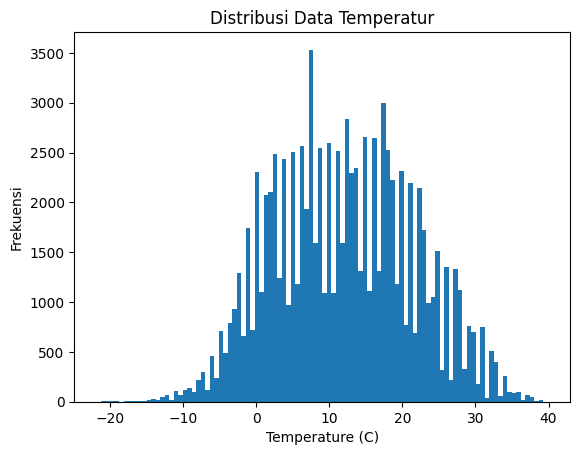

In [29]:
# Grafik distribusi data
import matplotlib.pyplot as plt

plt.hist(temperature, bins=100)
plt.xlabel("Temperature (C)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Data Temperatur")
plt.show()

In [42]:
# b. Uji Kosmologorov-Smirnov

# Melakukan uji KS humidity dengan tingkat kepercayaan 99%

alpha = 0.01
ks_stat, p_value = kstest(humidity, norm.cdf)

print("KS Statistic:", ks_stat)
print("P-value:", p_value)

if p_value >= alpha:
    print("Distribusi data normal")
else:
    print("Distribusi data tidak normal")

KS Statistic: 0.5990171816042561
P-value: 0.0
Distribusi data tidak normal


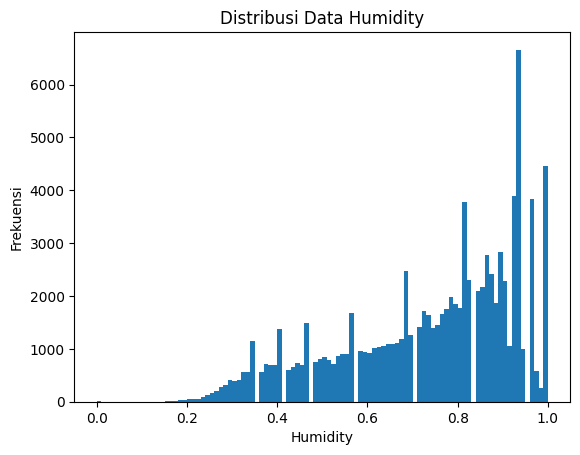

In [38]:
# Grafik distribusi data

plt.hist(humidity, bins=100)
plt.xlabel("Humidity")
plt.ylabel("Frekuensi")
plt.title("Distribusi Data Humidity")
plt.show()